In [15]:
from PIL import Image, ImageEnhance, ImageDraw, ImageFilter
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

def preprocessing_last(image_path):
    img = np.array(cv2.imread(image_path))
    image = img.copy()
    image[image > 250] = 0
    image = Image.fromarray(image)
    # width, height = image.shape[0], image.shape[1]
    # for corner in [(0,0),(0,height),(width,0),(width, height)]:
    #     color = (0,0,0,0)
    #     ImageDraw.floodfill(image2, xy=corner, value=color,thresh=150)
    #increasing the contrast 20%
    
    image = image.filter(ImageFilter.MinFilter(3))
    image = ImageEnhance.Contrast(image).enhance(2)
    
    # image = ImageEnhance.Sharpness(image2).enhance(1.3)
    # image = ImageEnhance.Brightness(image2).enhance(1.3)
    image = np.array(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = np.zeros(image.shape, np.uint8)
    
    gray = cv2.medianBlur(gray, 5)
    ret, gray = cv2.threshold(gray, 30,255,cv2.THRESH_BINARY)
    # gray = cv2.adaptiveThreshold(gray, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)
    # ret, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    closing_kernel = np.ones((15,15),np.uint8)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, closing_kernel, iterations=1)
    # closing = cv2.morphologyEx(closing, cv2.MORPH_OPEN, closing_kernel, iterations=1)

    contours, _ = cv2.findContours(closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_area = sorted(contours, key=cv2.contourArea)[-1:]
    cv2.drawContours(mask, largest_area, 0, (255,255,255), cv2.FILLED)
    # print(mask.shape)
    dst = cv2.bitwise_and(img, mask)
    # mask = 255 - mask
    # roi = cv2.add(dst, mask)
    # roi = mask / 255 * dst

    # selection = image.copy()
    # selection[roi == 255] = 0
    
    return img, closing, mask, dst


our_dataset/original/test/DME-224974-2.jpeg


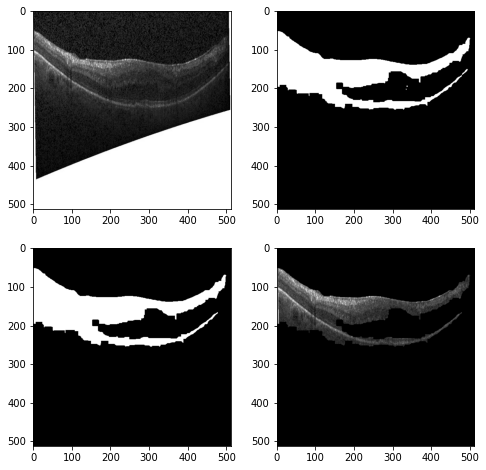

our_dataset/original/test/DME-224974-3.jpeg


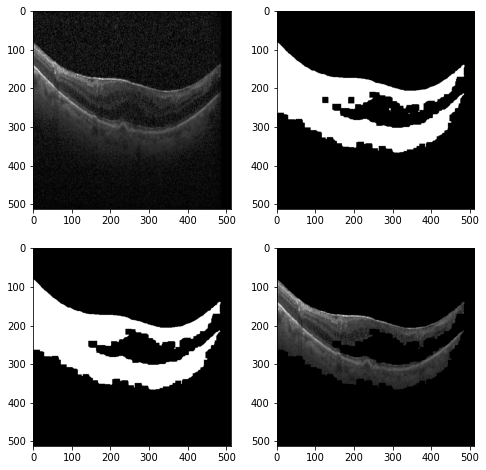

our_dataset/original/test/DME-2388519-12.jpeg


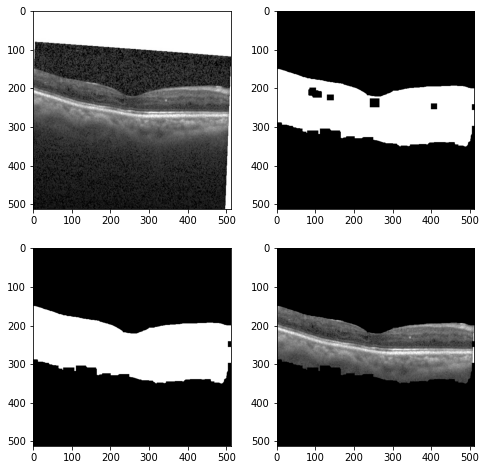

our_dataset/original/test/DME-2388519-2.jpeg


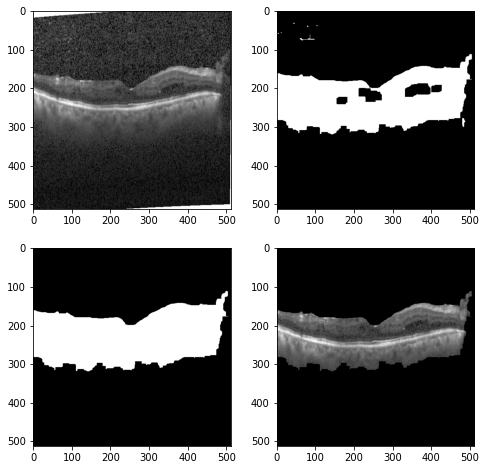

our_dataset/original/test/DME-224974-1.jpeg


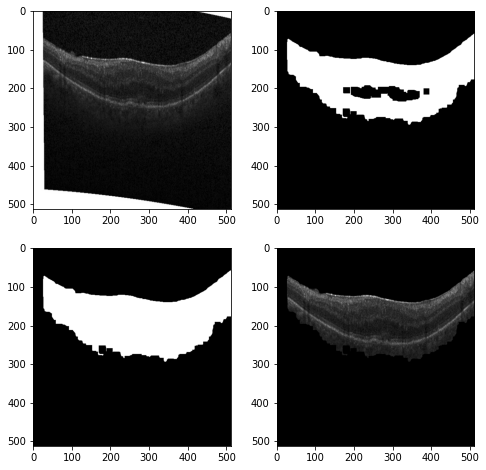

our_dataset/original/test/DME-2388519-10.jpeg


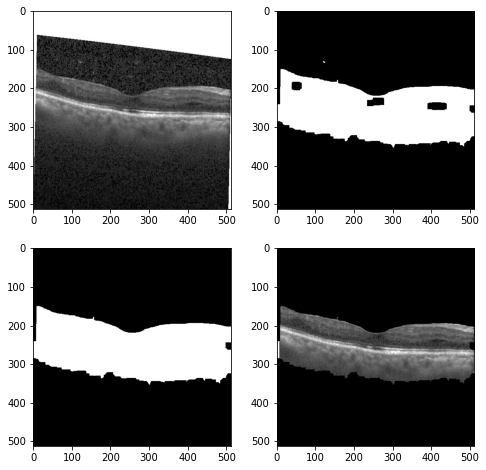

our_dataset/original/test/DME-2388519-4.jpeg


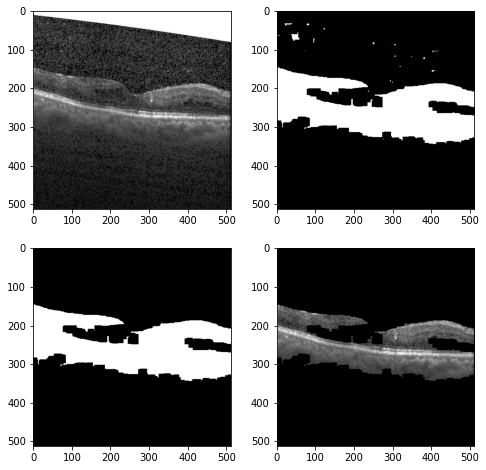

our_dataset/original/test/DME-2388519-1.jpeg


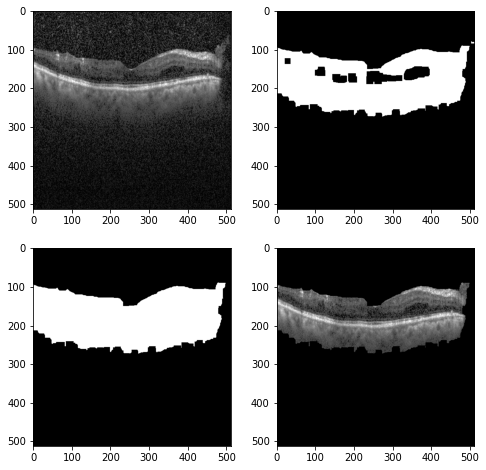

our_dataset/original/test/DME-2388519-3.jpeg


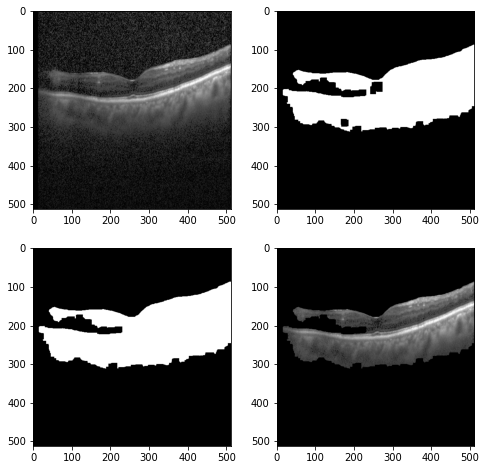

our_dataset/original/test/DME-2388519-6.jpeg


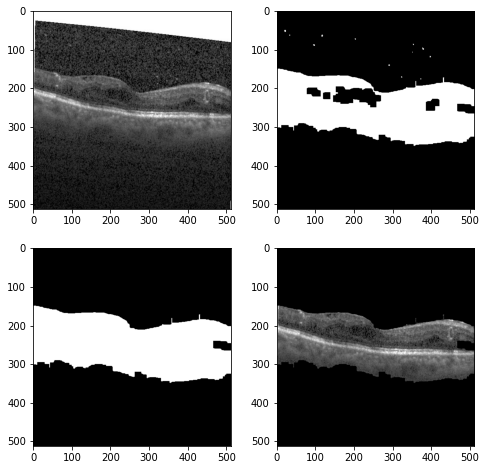

our_dataset/original/test/DME-2388519-9.jpeg


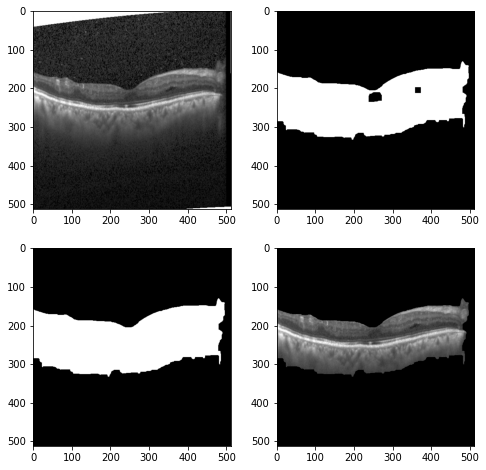

our_dataset/original/test/DME-2388519-5.jpeg


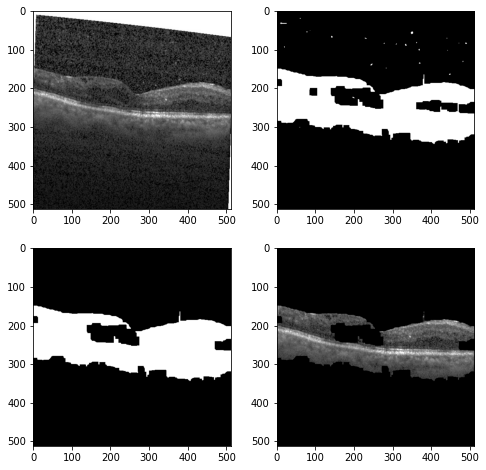

our_dataset/original/test/DME-224974-4.jpeg


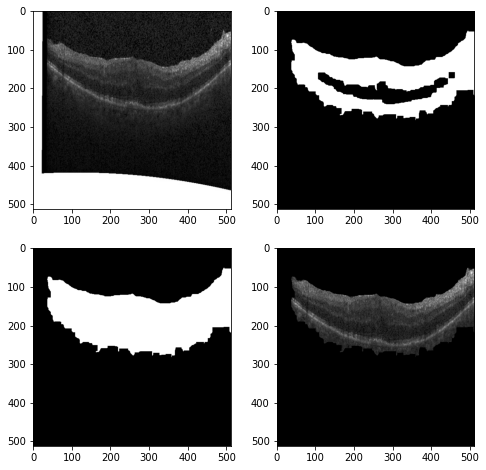

our_dataset/original/test/DME-2388519-7.jpeg


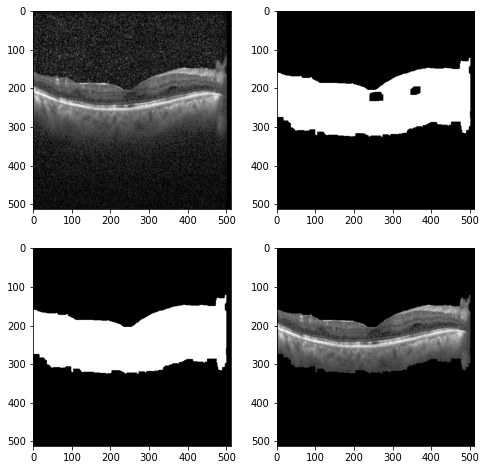

our_dataset/original/test/DME-224974-5.jpeg


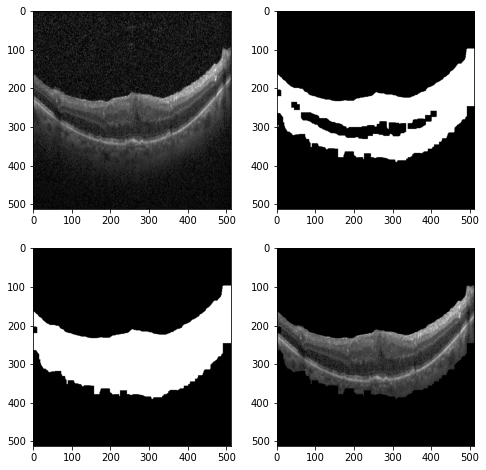

our_dataset/original/test/DME-2388519-11.jpeg


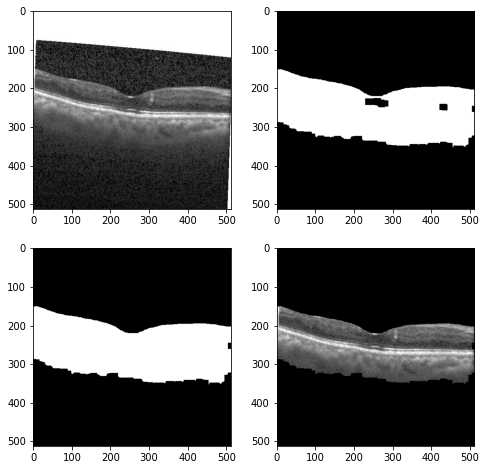

our_dataset/original/test/DME-2388519-8.jpeg


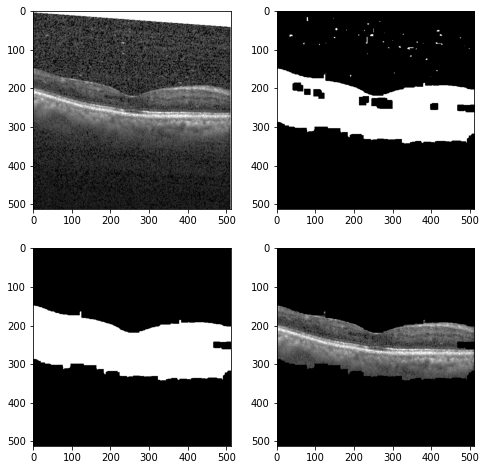

In [16]:
daataset = glob.glob("our_dataset/original/test/DME-2*")
# import random
# random.choice(range(10, 101))
for image_path in daataset:
    img, closing, mask, dst = preprocessing_last(image_path)
    print(image_path)
    plt.figure(figsize=(8,8))
    plt.subplot(2,2,1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    # plt.plot(img, camp='gray')
    plt.subplot(2,2,2)
    plt.imshow(closing, cmap='gray', vmin=0, vmax=255)
    # plt.plot(closing)
    plt.subplot(2,2,3)
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
    # plt.plot(mask)
    plt.subplot(2,2,4)
    plt.imshow(dst)
    # plt.plot(dst)
    # plt.plot(selection)
    
    plt.show()
    # import pdb; pdb.set_trace()

In [22]:
import glob

list_images = glob.glob('outputs_background/*/20.jpg')
len(list_images), list_images[:3]

(0, [])

In [12]:
import torchvision.utils as vutils
from torchvision.io import read_image
for img_path in list_images:
    img = read_image(img_path)
    vutils.save_image(img.unsqueeze(1) / 255, img_path, normalize=True, scale_each=True)
print('Done')

Done
